In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

random.seed(0)
np.random.seed(0)

In [10]:
data = pd.read_csv('data.txt',header=None,names=['x','y'],delim_whitespace=True)

In [11]:
data.head()

,x,y
0,-6.0,-164.160590
1,-5.8,90.739607
2,-5.6,-131.842090
3,-5.4,-178.428200
4,-5.2,-4.838565


<AxesSubplot:xlabel='x', ylabel='y'>

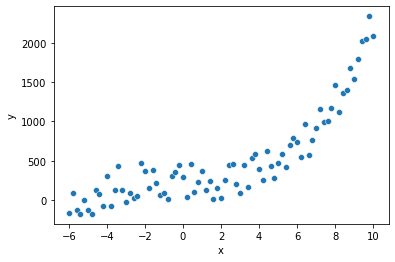

In [12]:
sns.scatterplot(x='x',y='y',data=data)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       81 non-null     float64
 1   y       81 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [14]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [15]:
#kfold
trainX=[]
trainY=[]
testX=[]
testY=[]
for i in range(10):
    data_shuffled = shuffle(data)
    X_train, X_test, y_train, y_test = train_test_split(data['x'], data['y'], test_size=0.1) ## 0.1
    trainX.append(X_train)
    trainY.append(y_train)
    testX.append(X_test)
    testY.append(y_test)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
stdTrainX=[]
stdTestX=[]
scaler = StandardScaler()
for i in range(10):
    stdTrainX.append(scaler.fit_transform(trainX[i].values.reshape(-1,1)))
    stdTestX.append(scaler.transform(testX[i].values.reshape(-1,1)))

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
from sklearn.metrics import r2_score

In [20]:
###3 a.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
models=[] ## to store all the models to use later for predicting test and traing error.

In [21]:
linearModel =[]
for i in range(10):
    linModel = LinearRegression()
    linModel.fit(stdTrainX[i],trainY[i])
    pred = linModel.predict(stdTestX[i])
    print("r2_score : ",r2_score(testY[i],pred))
    print("weights : ",linModel.coef_)
    print("w0 : ",linModel.intercept_)
    linearModel.append(linModel)
    print("**************\n")

r2_score :  0.20526725038417792
weights :  [504.920288]
w0 :  534.5404873055555
**************

r2_score :  0.6856720112515912
weights :  [480.40426919]
w0 :  500.66720217222223
**************

r2_score :  0.7913738756406766
weights :  [472.06874942]
w0 :  526.3041432138889
**************

r2_score :  0.2826838199894014
weights :  [504.050641]
w0 :  532.2710922555557
**************

r2_score :  0.010156365737586714
weights :  [513.25272226]
w0 :  514.6913096999999
**************

r2_score :  0.37217266513438996
weights :  [505.55775445]
w0 :  518.5488932555555
**************

r2_score :  0.5224964899952211
weights :  [506.55115069]
w0 :  509.1023191722222
**************

r2_score :  -1.2814690383666343
weights :  [515.51012971]
w0 :  533.5542967416667
**************

r2_score :  0.6006834572573093
weights :  [500.56334864]
w0 :  516.7837511722222
**************

r2_score :  0.6190323405451814
weights :  [490.27376457]
w0 :  485.64026592222217
**************



In [22]:
models.append(linearModel)

In [23]:
#### 3. b.
deg3Models=[]
poly = PolynomialFeatures(degree=3)
for i in range(10):
    X_Poly = poly.fit_transform(stdTrainX[i])
    X_Poly_test = poly.transform(stdTestX[i])
    poly.fit(X_Poly,trainY[i])
    polyModel = LinearRegression()
    polyModel.fit(X_Poly,trainY[i])
    pred = polyModel.predict(X_Poly_test)
    print("r2_score : ",r2_score(testY[i],pred))
    print("weights : ",polyModel.coef_)
    print("w0 ",polyModel.intercept_)
    print("*******************\n")
    deg3Models.append(polyModel)

r2_score :  0.7952886304245519
weights :  [  0.         169.92550789 273.82004482 183.37708805]
w0  258.8632387778928
*******************

r2_score :  0.9646491129741633
weights :  [  0.         112.2574175  241.12852671 200.4303977 ]
w0  253.29245914283584
*******************

r2_score :  0.9441285712003299
weights :  [  0.         159.64902556 300.26526726 186.40417755]
w0  249.77706615963297
*******************

r2_score :  0.7229990226673855
weights :  [  0.         160.08513095 276.48873652 185.92202488]
w0  254.56451227736898
*******************

r2_score :  0.688640419959096
weights :  [  0.         120.95272952 254.04058448 205.22763867]
w0  239.78173200453494
*******************

r2_score :  0.8795232083662833
weights :  [  0.         140.34970952 259.81273376 207.61164621]
w0  252.80698652845
*******************

r2_score :  0.7202079844738403
weights :  [  0.         139.82263523 284.39922874 211.18432958]
w0  222.75806737106836
*******************

r2_score :  0.61860844902

In [24]:
models.append(deg3Models)

In [25]:
#### 3. c.
deg5Models=[]
poly = PolynomialFeatures(degree=5)
for i in range(10):
    X_Poly = poly.fit_transform(stdTrainX[i])
    X_Poly_test = poly.transform(stdTestX[i])
    poly.fit(X_Poly,trainY[i])
    polyModel = LinearRegression()
    polyModel.fit(X_Poly,trainY[i])
    pred = polyModel.predict(X_Poly_test)
    print("r2_score : ",r2_score(testY[i],pred))
    print("weights : ",polyModel.coef_)
    print("w0 ",polyModel.intercept_)
    print("*******************\n")
    deg5Models.append(polyModel)

r2_score :  0.7985639876885511
weights :  [  0.         157.31532614 227.37788062 199.57751755  17.45924627
  -4.09760588]
w0  273.49599860560716
*******************

r2_score :  0.9670567941950322
weights :  [  0.         115.33070384 202.70295139 197.30171269  15.21043545
   0.40075993]
w0  264.38905441637075
*******************

r2_score :  0.9457456568693496
weights :  [  0.         175.47319913 272.39816281 161.51077976  11.26079554
   7.90004157]
w0  257.64458410515266
*******************

r2_score :  0.7248128327597869
weights :  [  0.         141.17855631 234.76970703 214.7589311   15.73166199
  -8.2377048 ]
w0  266.8575486803125
*******************

r2_score :  0.6991968699023744
weights :  [  0.         130.94745147 228.53149276 189.28508345  10.0294007
   4.62230301]
w0  247.30805505728364
*******************

r2_score :  0.8592622847074276
weights :  [  0.         178.20927885 179.00639092 145.94090921  32.54242412
  18.86728126]
w0  276.60528606562355
*******************



In [26]:
models.append(deg5Models)

In [104]:
### 3. d.
# deg50Models=[]
# poly = PolynomialFeatures(degree=50)
# for i in range(10):
#     X_Poly = poly.fit_transform(stdTrainX[i])
#     X_Poly_test = poly.transform(stdTestX[i])
#     poly.fit(X_Poly,trainY[i])
#     polyModel = LinearRegression()
#     polyModel.fit(X_Poly,trainY[i])
#     pred = polyModel.predict(X_Poly_test)
#     print(r2_score(testY[i],pred))
#     print(polyModel.coef_)
#     print(polyModel.intercept_)
#     deg50Models.append(polyModel)
# models.append(deg50Models)
        

mean train error :  101714.55154633928
std train error :  48754.08949136811
***************
mean train error :  98602.21872394692
std train error :  51016.801005300826
***************
mean train error :  103819.97852116785
std train error :  52894.886760334855
***************
mean train error :  101094.26464665019
std train error :  48236.95992953494
***************
mean train error :  103414.43180276245
std train error :  48305.21566207146
***************
mean train error :  100735.06507924307
std train error :  50697.489639675034
***************
mean train error :  106257.21586931255
std train error :  51960.44391424594
***************
mean train error :  102005.91248211126
std train error :  48931.03013174887
***************
mean train error :  104986.76460675447
std train error :  50591.2778618275
***************
mean train error :  102037.40456965909
std train error :  51282.99024497931
***************


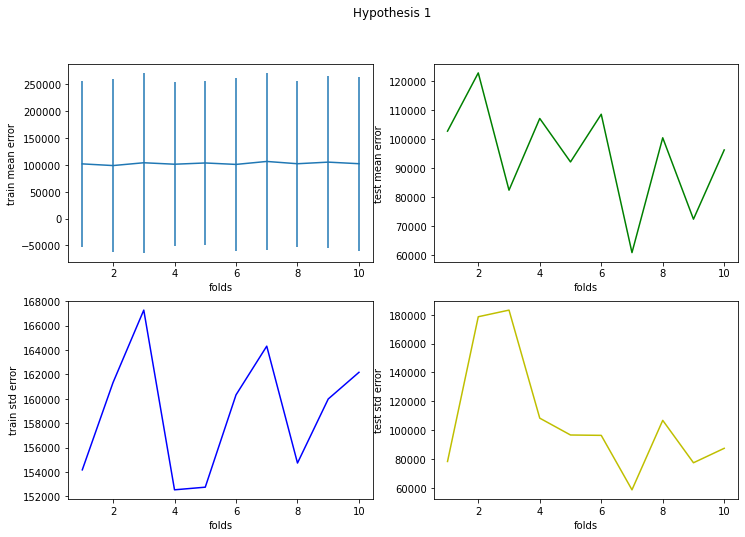

min training error  98602.21872394692  at index 2


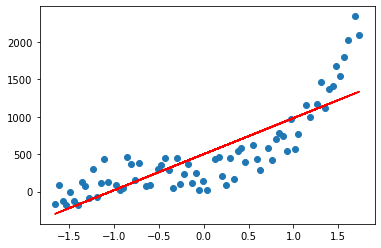

In [44]:
### 4.a (linear regression)
plt.figure(figsize=(12,8))
train_mean_err_list=[]
test_mean_err_list=[]
train_std_err_list=[]
test_std_err_list=[]
for i in range(10):
    predTrain = models[0][i].predict(stdTrainX[i])
    predTest = models[0][i].predict(stdTestX[i])
    train_err = np.square(predTrain-trainY[i])
    test_err = np.square(predTest-testY[i])
    train_mean_err_list.append(np.mean(train_err))
    test_mean_err_list.append(np.mean(test_err))
    train_std_err_list.append(np.std(train_err))
    test_std_err_list.append(np.std(test_err))
    print("mean train error : ",np.mean(train_err))
    print("std train error : ",np.std(train_err)/np.sqrt(10))
#     print("mean test error : ",np.mean(test_err))
#     print("std test error : ",np.std(test_err)/np.sqrt(10))
    print("***************")
ind=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(2,2,1)
#plt.plot(ind,train_mean_err_list,'r')
plt.errorbar(x=ind,y=train_mean_err_list,yerr=train_std_err_list)
plt.xlabel('folds')
plt.ylabel('train mean error')
plt.subplot(2,2,3)
plt.plot(ind,train_std_err_list,'b')
plt.xlabel('folds')
plt.ylabel('train std error')
plt.subplot(2,2,2)
plt.plot(ind,test_mean_err_list,'g')
plt.xlabel('folds')
plt.ylabel('test mean error')
plt.subplot(2,2,4)
plt.plot(ind,test_std_err_list,'y')
plt.xlabel('folds')
plt.ylabel('test std error')
plt.suptitle('Hypothesis 1')
plt.show()


#### 4.b)
#### minimum mean training error right????
min_val = min(train_mean_err_list)
min_ind = train_mean_err_list.index(min_val)
print("min training error ",min_val," at index",min_ind+1)
plt.scatter(stdTrainX[min_ind],trainY[min_ind])
pred = models[0][min_ind].predict(stdTrainX[min_ind])
plt.plot(stdTrainX[min_ind],pred,'r')

mean train error :  21454.309674212098
std train error :  6121.17190624193
***************
mean train error :  22921.128173705554
std train error :  6170.664309747959
***************
mean train error :  21929.14127962319
std train error :  6213.667622235468
***************
mean train error :  19498.209490504563
std train error :  5675.906458706042
***************
mean train error :  20959.595068690985
std train error :  6166.450896441206
***************
mean train error :  22042.740593498635
std train error :  6537.812066697656
***************
mean train error :  20311.851956800525
std train error :  6057.825489406318
***************
mean train error :  22491.641443290315
std train error :  6473.90685478788
***************
mean train error :  22234.168598057026
std train error :  6076.985658057564
***************
mean train error :  21875.383920786946
std train error :  6311.108321794493
***************


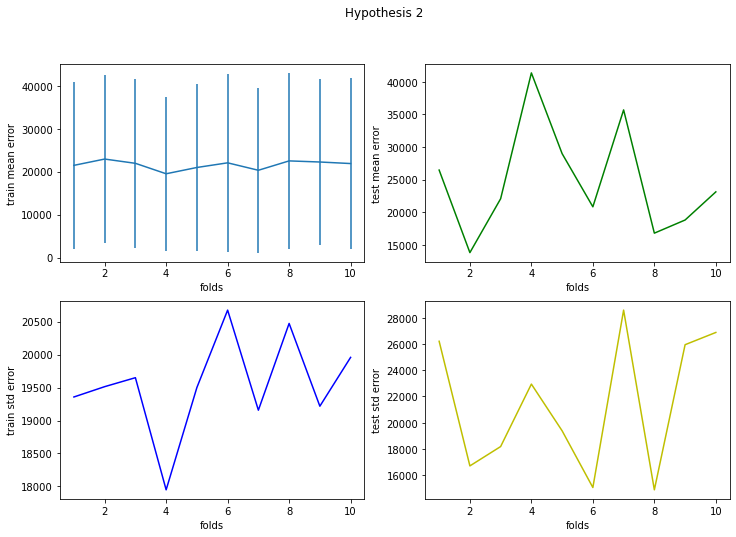

min training error  19498.209490504563  at index 4


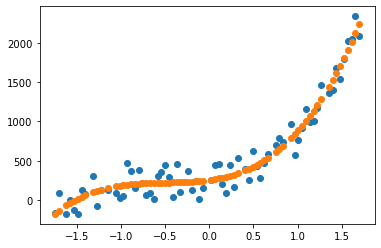

In [43]:
### 4.a (polynomial regression -degree 3)
plt.figure(figsize=(12,8))
train_mean_err_list=[]
test_mean_err_list=[]
train_std_err_list=[]
test_std_err_list=[]
poly = PolynomialFeatures(degree=3)
for i in range(10):
    X_Poly = poly.fit_transform(stdTrainX[i])
    X_Poly_test = poly.transform(stdTestX[i])
    predTrain = models[1][i].predict(X_Poly)
    predTest = models[1][i].predict(X_Poly_test)
    train_err = np.square(predTrain-trainY[i])
    test_err = np.square(predTest-testY[i])
    train_mean_err_list.append(np.mean(train_err))
    test_mean_err_list.append(np.mean(test_err))
    train_std_err_list.append(np.std(train_err))
    test_std_err_list.append(np.std(test_err))
    print("mean train error : ",np.mean(train_err))
    print("std train error : ",np.std(train_err)/np.sqrt(10))
#     print("mean test error : ",np.mean(test_err))
#     print("std test error : ",np.std(test_err)/np.sqrt(10))
    print("***************")
ind=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(2,2,1)
#plt.plot(ind,train_mean_err_list,'r')
plt.errorbar(x=ind,y=train_mean_err_list,yerr=train_std_err_list)
plt.xlabel('folds')
plt.ylabel('train mean error')
plt.subplot(2,2,3)
plt.plot(ind,train_std_err_list,'b')
plt.xlabel('folds')
plt.ylabel('train std error')
plt.subplot(2,2,2)
plt.plot(ind,test_mean_err_list,'g')
plt.xlabel('folds')
plt.ylabel('test mean error')
plt.subplot(2,2,4)
plt.plot(ind,test_std_err_list,'y')
plt.xlabel('folds')
plt.ylabel('test std error')
plt.suptitle('Hypothesis 2')
plt.show()

min_val = min(train_mean_err_list)
min_ind = train_mean_err_list.index(min_val)
print("min training error ",min_val," at index",min_ind+1)
plt.scatter(stdTrainX[min_ind],trainY[min_ind])
X_Poly = poly.fit_transform(stdTrainX[min_ind])
X_Poly_test = poly.transform(stdTestX[min_ind])
pred = models[1][min_ind].predict(X_Poly)
plt.scatter(stdTrainX[min_ind],pred)

mean train error :  21277.093218394162
std train error :  6331.6332525196085
***************
mean train error :  22817.084333191993
std train error :  6226.555510929829
***************
mean train error :  21860.429209306072
std train error :  6207.905617356442
***************
mean train error :  19338.55756111026
std train error :  5648.647768064311
***************
mean train error :  20905.368320074536
std train error :  6196.380582935267
***************
mean train error :  21507.265056583667
std train error :  6664.221938698945
***************
mean train error :  20218.245871232175
std train error :  6134.686422094751
***************
mean train error :  22138.899937734575
std train error :  6569.000826163927
***************
mean train error :  21929.91055551828
std train error :  6052.274535378053
***************
mean train error :  21376.153331198388
std train error :  6415.641080892765
***************


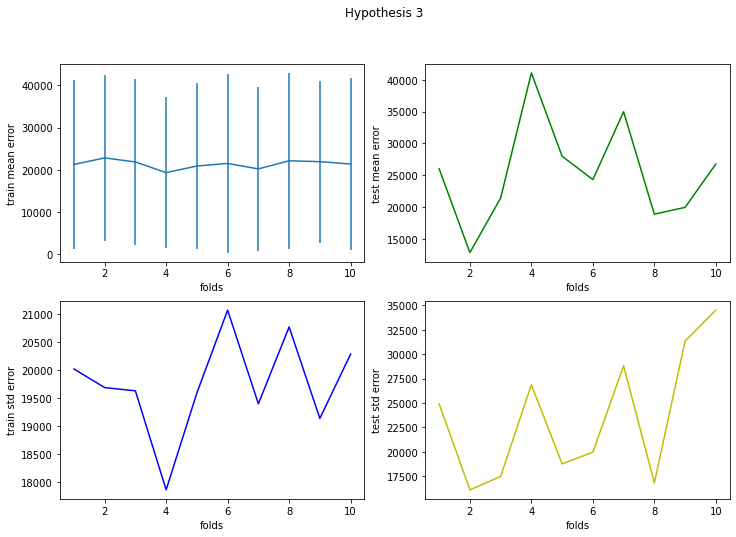

min training error  19338.55756111026  at index 4


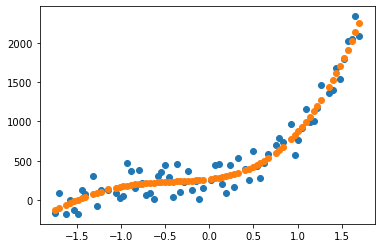

In [45]:
### 4.a (polynomial regression) degree 5
plt.figure(figsize=(12,8))
train_mean_err_list=[]
test_mean_err_list=[]
train_std_err_list=[]
test_std_err_list=[]
poly = PolynomialFeatures(degree=5)
for i in range(10):
    X_Poly = poly.fit_transform(stdTrainX[i])
    X_Poly_test = poly.transform(stdTestX[i])
    predTrain = models[2][i].predict(X_Poly)
    predTest = models[2][i].predict(X_Poly_test)
    train_err = np.square(predTrain-trainY[i])
    test_err = np.square(predTest-testY[i])
    train_mean_err_list.append(np.mean(train_err))
    test_mean_err_list.append(np.mean(test_err))
    train_std_err_list.append(np.std(train_err))
    test_std_err_list.append(np.std(test_err))
    print("mean train error : ",np.mean(train_err))
    print("std train error : ",np.std(train_err)/np.sqrt(10))
#     print("mean test error : ",np.mean(test_err))
#     print("std test error : ",np.std(test_err)/np.sqrt(10))
    print("***************")
ind=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(2,2,1)
#plt.plot(ind,train_mean_err_list,'r')
plt.errorbar(x=ind,y=train_mean_err_list,yerr=train_std_err_list)
plt.xlabel('folds')
plt.ylabel('train mean error')
plt.subplot(2,2,3)
plt.plot(ind,train_std_err_list,'b')
plt.xlabel('folds')
plt.ylabel('train std error')
plt.subplot(2,2,2)
plt.plot(ind,test_mean_err_list,'g')
plt.xlabel('folds')
plt.ylabel('test mean error')
plt.subplot(2,2,4)
plt.plot(ind,test_std_err_list,'y')
plt.xlabel('folds')
plt.ylabel('test std error')
plt.suptitle('Hypothesis 3')
plt.show()


min_val = min(train_mean_err_list)
min_ind = train_mean_err_list.index(min_val)
print("min training error ",min_val," at index",min_ind+1)
plt.scatter(stdTrainX[min_ind],trainY[min_ind])
X_Poly = poly.fit_transform(stdTrainX[min_ind])
X_Poly_test = poly.transform(stdTestX[min_ind])
pred = models[2][min_ind].predict(X_Poly)
plt.scatter(stdTrainX[min_ind],pred)

In [34]:
len(models)

3